## Анализ зависимости содержания органического углерода (ТОС) к глинистости ГП ##

In [350]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

<center><b>Глоссарий</b> (можно не читать)</center>

***ТОС*** - Total organic carbon - содержание органического углерода в образце осадочной горной породы (ГП)

***Tmax*** - температура максимального выхода жидких углеводородов, т.е. температура, соответствующая зрелости породы (не температура в недрах, а лабораторная температурная величина, соответствующая температуре в недрах), когда образец породы начинает выделять жидкую нефть. (Происходит превращение органического вещества в углеводороды, нефть выходит из породы, ТОС уменьшается при росте Тmax)

***Кглинистости*** (коэффициент глинистости) - доля глинистого вещества в ГП

***HI*** - водородный индекс - соответствует содержанию водорода

Почему ищем зависимость ТОС от Кглинистости?

Потому что органическое вещество наиболее охотно сорбируется на глинистых частицах. Следовательно, при увеличении Кглинистости должно увеличиваться ТОС.

In [3]:
df = pd.read_csv('TOC_csv.csv', sep = ';' , encoding='cp1251')

In [4]:
df

,"Площадь,_скв.","Глубина,_м",Возраст,Литология,Tmax,ТОС,Kглинистости,HI
0,Западно-Кубалахская_359,"2335,1",J3,аргиллиты_темно-серые_до_черных,429.0,"1,7","0,295668",153.0
1,Западно-Кубалахская_359,"2336,1",J3,аргиллиты_темно-серые_до_черных,431.0,"1,3","0,259003",125.0
2,Западно-Кубалахская_359,"2337,1",J3,аргиллиты_темно-серые_до_черных,431.0,"1,44","0,30578",103.0
3,Западно-Кубалахская_359,"2338,35",J3,аргиллиты_темно-серые_до_черных,432.0,"1,4","0,354326",96.0
4,Западно-Кубалахская_359,"2339,35",J3,аргиллиты_темно-серые_до_черных,436.0,"1,57","0,258101",101.0
...,...,...,...,...,...,...,...,...
693,Южно-Носковская_318,"4032,3",J2ml,алевропелиты_темно-серые,473.0,"1,21","0,15",40.0
694,Южно-Носковская_318,"4140,78",J2ml,песчаник_с_просл.углист.матер.,482.0,"1,84","0,24",60.0
695,Южно-Носковская_318,"4158,05",J2ml,алевролиты_темно-серые,484.0,"2,36","0,14",50.0
696,Южно-Носковская_318,"4158,87",J2ml,алевролиты_темно-серые,483.0,"2,52","0,14",58.0


**Подготовка данных**

In [5]:
df.columns = ['Площадь,скв.', 'Глубина,м', 'Возраст', 'Литология', 'Tmax', 'TOC', 'Kглинистости', 'HI']

In [6]:
df['Глубина,м'] = df['Глубина,м'].str.replace(',', '.')
df['TOC'] = df['TOC'].str.replace(',', '.')
df['Kглинистости'] = df['Kглинистости'].str.replace(',', '.')

In [7]:
df['Глубина,м'] = df['Глубина,м'].replace('#ЧИСЛО!', 'Nan')
df['TOC'] = df['TOC'].replace('#ЧИСЛО!', 'Nan')
df['Kглинистости'] = df['Kглинистости'].replace('#ЧИСЛО!', 'Nan')

In [8]:
df['Глубина,м'] = df['Глубина,м'].astype(float)
df['TOC'] = df['TOC'].astype(float)
df['Kглинистости'] = df['Kглинистости'].astype(float)

In [212]:
df.dropna(inplace = True)

<center><b>Подготовленный датасет</b></center>

In [213]:
df

,"Площадь,скв.","Глубина,м",Возраст,Литология,Tmax,TOC,Kглинистости,HI
0,Западно-Кубалахская_359,2335.10,J3,аргиллиты_темно-серые_до_черных,429.0,1.70,0.295668,153.0
1,Западно-Кубалахская_359,2336.10,J3,аргиллиты_темно-серые_до_черных,431.0,1.30,0.259003,125.0
2,Западно-Кубалахская_359,2337.10,J3,аргиллиты_темно-серые_до_черных,431.0,1.44,0.305780,103.0
3,Западно-Кубалахская_359,2338.35,J3,аргиллиты_темно-серые_до_черных,432.0,1.40,0.354326,96.0
4,Западно-Кубалахская_359,2339.35,J3,аргиллиты_темно-серые_до_черных,436.0,1.57,0.258101,101.0
...,...,...,...,...,...,...,...,...
693,Южно-Носковская_318,4032.30,J2ml,алевропелиты_темно-серые,473.0,1.21,0.150000,40.0
694,Южно-Носковская_318,4140.78,J2ml,песчаник_с_просл.углист.матер.,482.0,1.84,0.240000,60.0
695,Южно-Носковская_318,4158.05,J2ml,алевролиты_темно-серые,484.0,2.36,0.140000,50.0
696,Южно-Носковская_318,4158.87,J2ml,алевролиты_темно-серые,483.0,2.52,0.140000,58.0


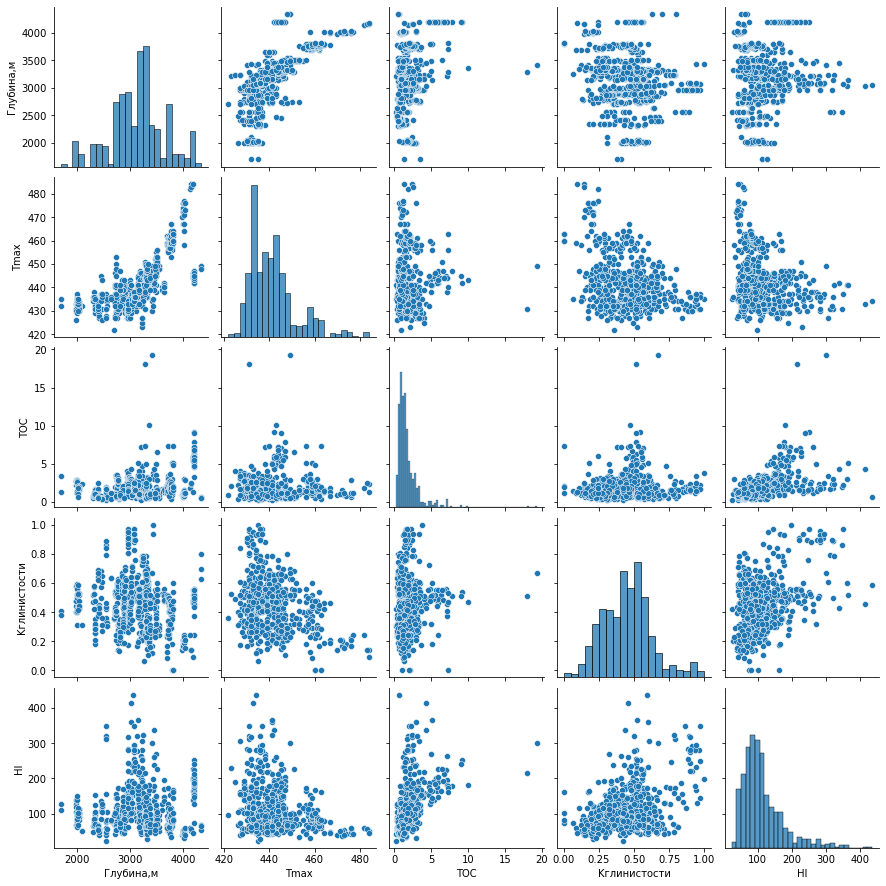

In [214]:
sns.pairplot(df)

Text(0, 0.5, 'Количество')

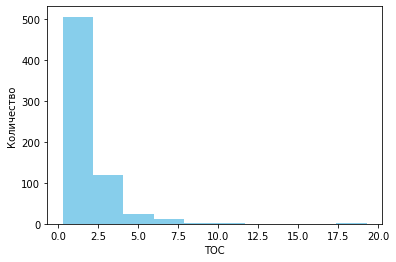

In [217]:
df['TOC'].plot(kind = 'hist', color = 'skyblue')
plt.xlabel(df['TOC'].name)
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

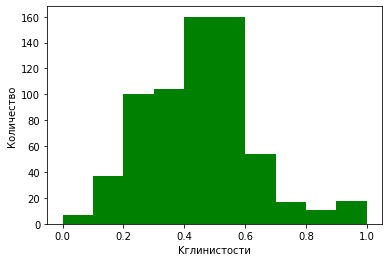

In [218]:
df['Kглинистости'].plot(kind = 'hist', color = 'green')
plt.xlabel(df['Kглинистости'].name)
plt.ylabel('Количество')

**<center>ТОС/Кглинистости</center>**

<AxesSubplot:xlabel='Kглинистости', ylabel='TOC'>

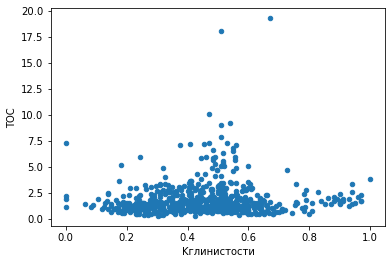

In [219]:
df.plot(x = 'Kглинистости', y = 'TOC', kind = 'scatter')

<AxesSubplot:xlabel='Kглинистости', ylabel='TOC'>

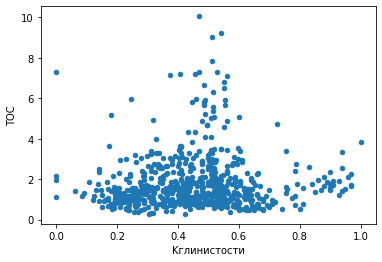

In [220]:
# временное удаление выбросов
df[lambda x: x['TOC']<15].plot( x = 'Kглинистости', y = 'TOC', kind = 'scatter')

<AxesSubplot:xlabel='TOC', ylabel='Kглинистости'>

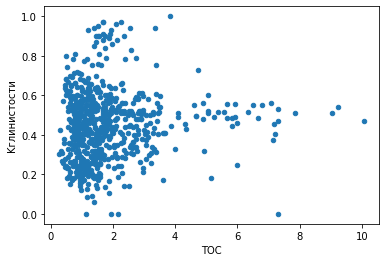

In [221]:
# поменять оси
df[lambda x: x['TOC']<15].plot( x = 'TOC', y = 'Kглинистости', kind = 'scatter')

In [222]:
df[['Глубина,м','Tmax','TOC','Kглинистости','HI']]

,"Глубина,м",Tmax,TOC,Kглинистости,HI
0,2335.10,429.0,1.70,0.295668,153.0
1,2336.10,431.0,1.30,0.259003,125.0
2,2337.10,431.0,1.44,0.305780,103.0
3,2338.35,432.0,1.40,0.354326,96.0
4,2339.35,436.0,1.57,0.258101,101.0
...,...,...,...,...,...
693,4032.30,473.0,1.21,0.150000,40.0
694,4140.78,482.0,1.84,0.240000,60.0
695,4158.05,484.0,2.36,0.140000,50.0
696,4158.87,483.0,2.52,0.140000,58.0


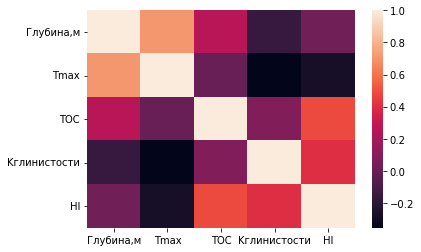

In [223]:
sns.heatmap(df[['Глубина,м','Tmax','TOC','Kглинистости','HI']].corr());

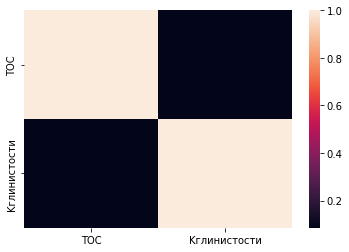

In [224]:
sns.heatmap(df[['TOC','Kглинистости']].corr());

ЛИНЕЙНОЙ ЗАВИСИМОСТИ НЕТ

PS: Можно посмотреть Спирмэновскую корреляцию, но пока был поиск именно линейной зависимости

**Можно посмотреть зависимость между логарифмами**

In [225]:
df['TOC'].values, df['Kглинистости'].values;

In [226]:
TOC_log = (df['TOC'].values).copy()
Kclay_log = (df['Kглинистости'].values).copy()
for i in range(len(TOC_log)):
    if (TOC_log[i] != 0):
        TOC_log[i] = math.log10(TOC_log[i])
    else:
        TOC_log[i] = None     
    if (Kclay_log[i] != 0): 
        Kclay_log[i] = math.log10(Kclay_log[i])
    else:
        Kclay_log[i] = None

In [227]:
TOC_log, Kclay_log;

Text(0, 0.5, 'log_Кглинистости')

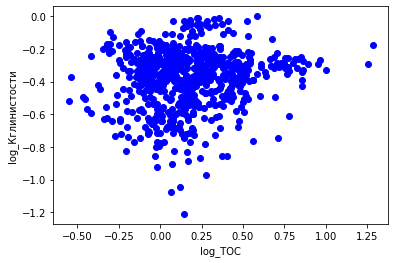

In [228]:
plt.plot(TOC_log, Kclay_log, 'bo')
plt.xlabel('log_TOC')
plt.ylabel('log_Кглинистости')

Уже лучше, но как интерпретировать отрицательные значения))?

**Можно посмотреть зависимость между квадратами**

In [229]:
TOC_qrt = (df['TOC'].values).copy()
Kclay_qrt = (df['Kглинистости'].values).copy()

for i in range(len(TOC_qrt)):
    TOC_qrt[i] = (TOC_qrt[i])**2   
    Kclay_qrt[i] = (Kclay_qrt[i])**2

Text(0, 0.5, 'Кглинистости^2')

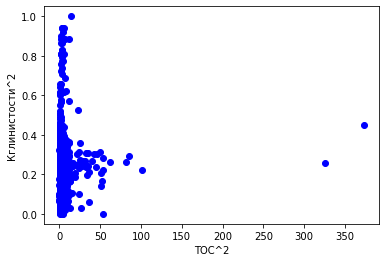

In [230]:
plt.plot(TOC_qrt, Kclay_qrt, 'bo')
plt.xlabel('ТОС^2')
plt.ylabel('Кглинистости^2')

Можно попробовать удалить выброс

In [231]:
f = (lambda x: (x < 100)) # удалено 7 значений
TOC_qrt_without_em = list(filter(f,TOC_qrt))

Text(0, 0.5, 'Кглинистости^2')

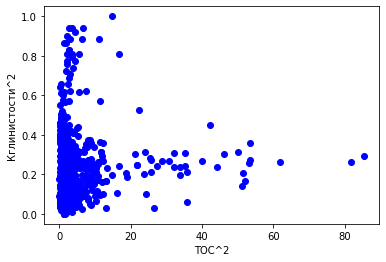

In [233]:
plt.plot(TOC_qrt_without_em, Kclay_qrt[:len(TOC_qrt_without_em)], 'bo') 
# Kclay_qrt[:len(TOC_qrt_without_em)] необходимо брать до определенной длины [:len(TOC_qrt_without_em)],
# чтобы совпадали размерности
plt.xlabel('ТОС^2')
plt.ylabel('Кглинистости^2')

Еще раз срезать)

In [234]:
f = (lambda x: (x < 60)) # удалено 10 значений
TOC_qrt_without_em = list(filter(f,TOC_qrt))

Text(0, 0.5, 'Кглинистости^2')

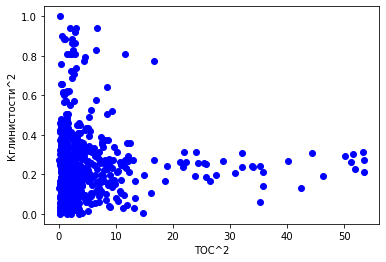

In [235]:
plt.plot(TOC_qrt_without_em, Kclay_qrt[:len(TOC_qrt_without_em)], 'bo') 
plt.xlabel('ТОС^2')
plt.ylabel('Кглинистости^2')

И еще раз)

In [236]:
f = (lambda x: (x < 10)) # удалено 77 значений
TOC_qrt_without_em = list(filter(f,TOC_qrt))

Text(0, 0.5, 'Кглинистости^2')

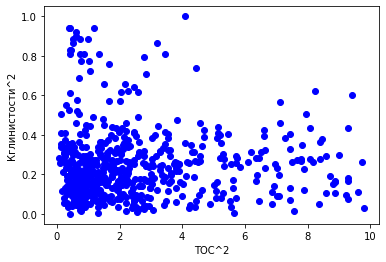

In [237]:
plt.plot(TOC_qrt_without_em, Kclay_qrt[:len(TOC_qrt_without_em)], 'bo') 
plt.xlabel('ТОС^2')
plt.ylabel('Кглинистости^2')

Как это можно интерпретировать? 

Ну, возможно, что породы с высокими значениями Кгл и ТОС начали генерировать нефть и ТОС начал падать за счет этого

**Теперь можно попробовать сделать линейную регрессию**

Функция ошибок

err(a,b) = (y - (a*x+b))^2

y = Кглинистости

x = ТОС

In [268]:
# Выборка
x_i = np.array(TOC_qrt_without_em)
y_i = np.array(Kclay_qrt[:len(TOC_qrt_without_em)])

In [269]:
def f(a, x, b = 0):
    return (a * x + b)
    
def Q(a, x, y,  b = 0):
    y_ = f(a, x) # предсказанное значение
    return ((y - y_)**2)

def grad(a, x, y, b = 0):
    return ( (2*(y - f(a,x,b))*(-x)) ) # градиент по весам

def norm(v):
    return (( (np.array(v)**2).sum() )**.5)

**Самый простой пакетный градиентный спуск**

In [320]:
def batch_GD(a_0, X, y, alpha = 0.01, batch_size = 1, eps = 1e-4, verbose = False):
    a_current = a_0
    n_butches = len(X) // batch_size
    for i in range(0, n_butches, batch_size):
        # разделение на батчи
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        # теперь сам проход по дивергенции Бригмана
        gr = grad( a_current, X_batch, y_batch )
        if (norm([gr]) > eps): 
            a_current = a_current - alpha * gr
            continue
        else:
            break
        if (verbose == True):
            print('Loss = ',Q(a_current, X_batch, y_batch,  b = 0)[0])
    return (a_current[0])

In [321]:
coef = batch_GD(3, x_i, y_i)
coef

0.03662184075582621

Пусть b = 0, будем вести прямую из нуля

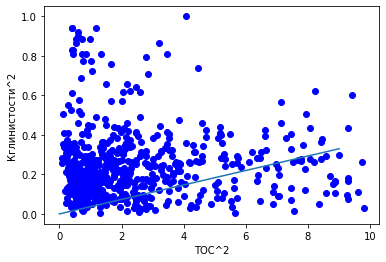

In [322]:
plt.plot(TOC_qrt_without_em, Kclay_qrt[:len(TOC_qrt_without_em)], 'bo') 
plt.xlabel('ТОС^2')
plt.ylabel('Кглинистости^2')
x = np.arange(0, 10, 1)
plt.plot(x, f(a = coef, x = x))